# Fast.AI

In [2]:
from fastai.vision.all import *

## Single Label Classification von Bildern

Fine-Tuning eines vortrainierten Modells

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/home/tc/.fastai/data/oxford-iiit-pet/images'),Path('/home/tc/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
files = get_image_files(path/'images')
len(files)

7390

In [6]:
files[0]

Path('/home/tc/.fastai/data/oxford-iiit-pet/images/Ragdoll_18.jpg')

In [7]:
def label_func(f):
    return f[0].isupper()

In [8]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

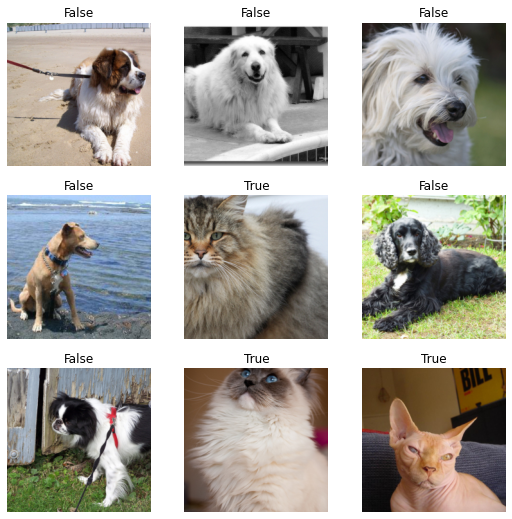

In [11]:
dls.show_batch()

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.134986,0.031385,0.011502,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.070255,0.020959,0.009472,00:13


In [14]:
learn.predict(files[0])

('True', tensor(1), tensor([1.6669e-14, 1.0000e+00]))

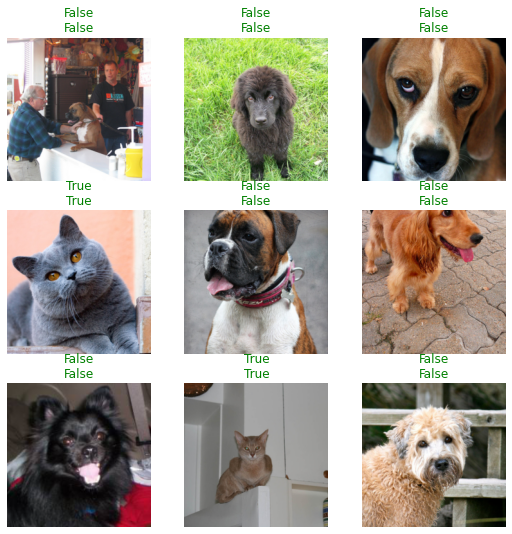

In [15]:
learn.show_results()

# Klassifikation von Hunderassen

In [16]:
files[0].name

'Ragdoll_18.jpg'

In [17]:
pat = r'^(.*)_\d+.jpg'

In [18]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

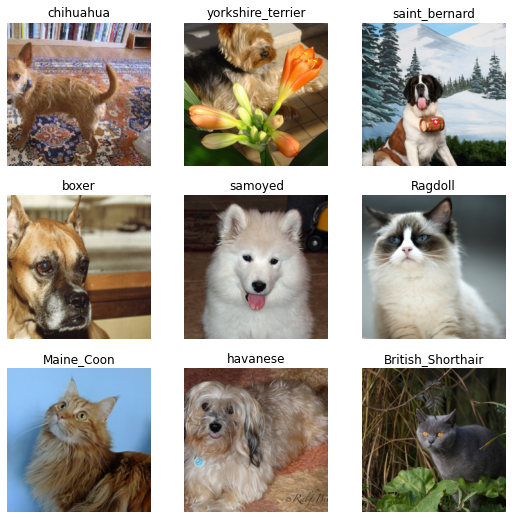

In [19]:
dls.show_batch()

In [24]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

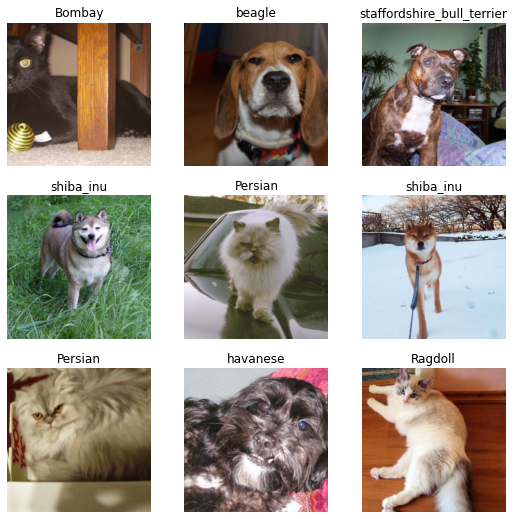

In [25]:
dls.show_batch()

In [26]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [28]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(dls, arch, loss_func=None, pretrained=True, cut=None, splitter=None, y_range=None, config=None, n_out=None, normalize=True, opt_func=<function Adam at 0x7fccacab7700>, lr=0.001, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))
    Build a convnet style learner from `dls` and `arch`



SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0030199517495930195)

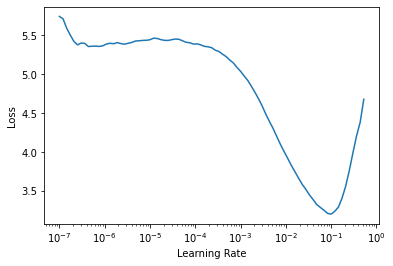

In [29]:
learn.lr_find()

In [30]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.300135,0.316761,0.099459,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.466051,0.404399,0.116373,00:15
1,0.422359,0.280975,0.083897,00:15
2,0.257406,0.233014,0.077131,00:15
3,0.139909,0.213248,0.069689,00:15


In [31]:
interp = Interpretation.from_learner(learn)

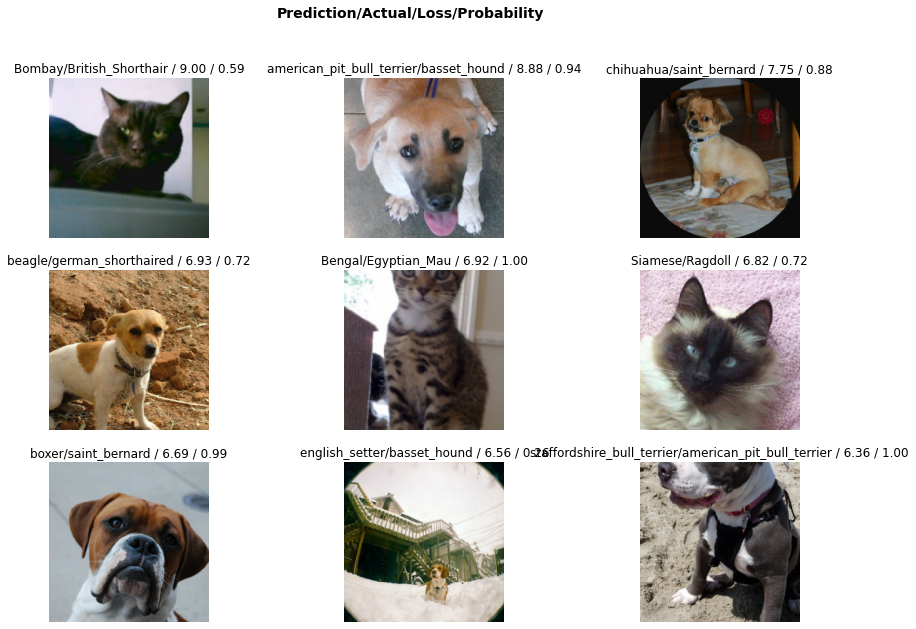

In [32]:
interp.plot_top_losses(9, figsize=(15, 10))

# Plain PyTorch

In [35]:
from fastai.vision.all import *

In [38]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [39]:
class Flatten(nn.Module):
    def forward(self, x): return x.view(x.size(0), -1)

In [40]:
class Net(nn.Sequential):
    def __init__(self):
        super().__init__(
            nn.Conv2d(1, 32, 3, 1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1), nn.MaxPool2d(2), nn.Dropout2d(0.25),
            Flatten(), nn.Linear(9216, 128), nn.ReLU(), nn.Dropout2d(0.5),
            nn.Linear(128, 10), nn.LogSoftmax(dim=1) )

In [41]:
train_loader = DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=transform),
                   batch_size=batch_size, shuffle=True, **kwargs)
test_loader = DataLoader(
    datasets.MNIST('../data', train=False, transform=transform),
                   batch_size=test_batch_size, shuffle=True, **kwargs)

In [42]:
data = DataLoaders(train_loader, test_loader)

In [43]:
learn = Learner(data, Net(), loss_func=F.nll_loss, opt_func=Adam, metrics=accuracy, cbs=CudaCallback)

In [44]:
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.142646,0.052311,0.982500,00:06


In [45]:
?transform